                                         # Regression Analysis : UIAA
                                         # Team: Ashvita, Sanjana, Smit, Saurav, Vikrant

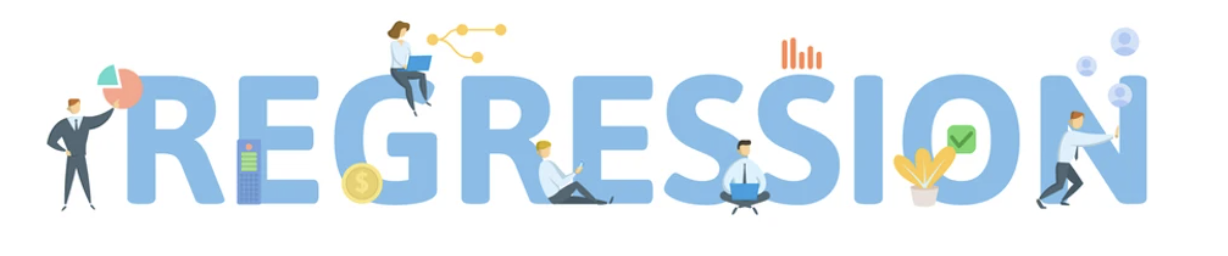

In [1]:
import pandas as pd

# Load the dataframe that contains all members 
# Note : This data is already encoded and ready to run regression analysis
df = pd.read_csv("/Users/sanjana_pai/Downloads/mem.csv")

In [2]:
# Columns in the data
df.columns

Index(['Lookup ID', 'Age', 'Gender_Female', 'Gender_Male', 'Gender_Unknown',
       'Marital status_Divorced', 'Marital status_Life Partner',
       'Marital status_Married', 'Marital status_Single',
       'Marital status_Unknown', 'Marital status_Widow/er',
       'Education History\Class of_(1949.999, 1983.0]',
       'Education History\Class of_(1983.0, 1992.0]',
       'Education History\Class of_(1992.0, 2001.0]',
       'Education History\Class of_(2001.0, 2025.0]',
       'Education History\Educational degree_AA:',
       'Education History\Educational degree_AB:',
       'Education History\Educational degree_AVI',
       'Education History\Educational degree_BA:',
       'Education History\Educational degree_BAL',
       'Education History\Educational degree_BBA',
       'Education History\Educational degree_BFA',
       'Education History\Educational degree_BME',
       'Education History\Educational degree_BMU',
       'Education History\Educational degree_BS:',
       'Educ

In [3]:
# Dataset that has the y-label
df_2=pd.read_excel("/Users/sanjana_pai/Documents/Marketing analytics/Membership w Giving.xlsx")

In [4]:
df_2.columns

Index(['Lookup ID', 'Age',
       'Donor History\Entity Cumulative Lifetime Giving Amount',
       'Donor History\Household Cumulative Lifetime Giving Years',
       'Donor History\Household Consecutive Years of Giving', 'QUERYRECID'],
      dtype='object')

In [5]:
# Group by Lookup ID and aggregate columns
aggregated_df = df_2.groupby("Lookup ID").agg({
    "Age": "first", 
    "Donor History\\Entity Cumulative Lifetime Giving Amount": "sum",
    "Donor History\\Household Cumulative Lifetime Giving Years": "max",
    "Donor History\\Household Consecutive Years of Giving": "sum",
    "QUERYRECID": "first"
})

# Rename the columns
aggregated_df.columns = [
    "Age",
    "Donor History\\Entity Cumulative Lifetime Giving Amount",
    "Donor History\\Household Cumulative Lifetime Giving Years",
    "Donor History\\Household Consecutive Years of Giving",
    "QUERYRECID"
]

# Reset the index to get the Lookup ID back as a column
aggregated_df = aggregated_df.reset_index()

In [6]:
aggregated_df.isnull().sum()

Lookup ID                                                   0
Age                                                         0
Donor History\Entity Cumulative Lifetime Giving Amount      0
Donor History\Household Cumulative Lifetime Giving Years    0
Donor History\Household Consecutive Years of Giving         0
QUERYRECID                                                  0
dtype: int64

In [7]:
# Merging both the dataframes on lookup ID
merge_df = pd.merge(df, aggregated_df, on="Lookup ID")

In [8]:
merge_df

,Lookup ID,Age_x,Gender_Female,Gender_Male,Gender_Unknown,Marital status_Divorced,Marital status_Life Partner,Marital status_Married,Marital status_Single,Marital status_Unknown,...,Education History\Educational degree_PHA,Education History\Educational degree_PHD,Education History\Educational degree_nan,Email Addresses\Email address_Yes,Email Addresses\Email address_no,Age_y,Donor History\Entity Cumulative Lifetime Giving Amount,Donor History\Household Cumulative Lifetime Giving Years,Donor History\Household Consecutive Years of Giving,QUERYRECID
0,11434386,76,1,0,0,0,0,0,0,0,...,0,0,1,1,0,77,228331.43,39,420,92eb355a-efa5-4bca-8a37-131ac5ff5b31
1,11100277,26,0,1,0,0,0,0,0,1,...,0,0,0,1,0,26,18.00,1,1,d24a40a4-e4de-4aa4-b3e4-26c50cef6742
2,11538564,63,0,1,0,0,0,1,0,0,...,0,0,0,1,0,63,22850.00,14,26,994c9e38-33e4-4034-b2e0-9d37a73361e1
3,11661970,49,1,0,0,0,0,1,0,0,...,0,0,0,1,0,49,396.88,3,4,023c3486-ed83-43d6-b247-19003897a550
4,11954311,40,1,0,0,0,0,0,0,1,...,0,0,1,1,0,40,586.70,3,4,fcaf17d7-847f-495e-8420-0daaab51b498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,11786734,43,0,1,0,0,0,1,0,0,...,0,0,1,1,0,44,5647.00,3,6,cfb555a3-e8a1-4419-98fb-a866701f7fc3
149,11410260,50,0,1,0,0,0,1,0,0,...,0,0,0,1,0,50,44200.00,5,7,79e2a4e7-cfd8-4e74-920c-556faca82e00
150,11678846,49,0,1,0,0,0,1,0,0,...,0,0,0,1,0,49,202.50,2,3,0f83c6bd-5eb5-4751-9c7b-487a6f911174
151,10431123,72,1,0,0,0,0,1,0,0,...,0,0,0,1,0,73,300.00,3,3,90956416-4d1b-4a29-999f-d9a387597868


In [9]:
merge_df.columns

Index(['Lookup ID', 'Age_x', 'Gender_Female', 'Gender_Male', 'Gender_Unknown',
       'Marital status_Divorced', 'Marital status_Life Partner',
       'Marital status_Married', 'Marital status_Single',
       'Marital status_Unknown', 'Marital status_Widow/er',
       'Education History\Class of_(1949.999, 1983.0]',
       'Education History\Class of_(1983.0, 1992.0]',
       'Education History\Class of_(1992.0, 2001.0]',
       'Education History\Class of_(2001.0, 2025.0]',
       'Education History\Educational degree_AA:',
       'Education History\Educational degree_AB:',
       'Education History\Educational degree_AVI',
       'Education History\Educational degree_BA:',
       'Education History\Educational degree_BAL',
       'Education History\Educational degree_BBA',
       'Education History\Educational degree_BFA',
       'Education History\Educational degree_BME',
       'Education History\Educational degree_BMU',
       'Education History\Educational degree_BS:',
       'Ed

In [33]:
merge_df.shape

(153, 62)

In [12]:
# deriving x and y 
y = merge_df['Donor History\Entity Cumulative Lifetime Giving Amount']
X = merge_df.drop(['Donor History\Household Cumulative Lifetime Giving Years','Donor History\Household Consecutive Years of Giving','QUERYRECID'],axis=1)

In [13]:
y

0      228331.43
1          18.00
2       22850.00
3         396.88
4         586.70
         ...    
148      5647.00
149     44200.00
150       202.50
151       300.00
152     14450.00
Name: Donor History\Entity Cumulative Lifetime Giving Amount, Length: 153, dtype: float64

In [14]:
X

,Lookup ID,Age_x,Gender_Female,Gender_Male,Gender_Unknown,Marital status_Divorced,Marital status_Life Partner,Marital status_Married,Marital status_Single,Marital status_Unknown,...,Education History\Educational degree_MS:,Education History\Educational degree_MSW,Education History\Educational degree_NDE,Education History\Educational degree_PHA,Education History\Educational degree_PHD,Education History\Educational degree_nan,Email Addresses\Email address_Yes,Email Addresses\Email address_no,Age_y,Donor History\Entity Cumulative Lifetime Giving Amount
0,11434386,76,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,77,228331.43
1,11100277,26,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,26,18.00
2,11538564,63,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,63,22850.00
3,11661970,49,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,49,396.88
4,11954311,40,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,40,586.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,11786734,43,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,44,5647.00
149,11410260,50,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,50,44200.00
150,11678846,49,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,49,202.50
151,10431123,72,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,73,300.00


In [18]:
y.shape

(153,)

In [20]:
# Reshaping y 
y=y.values.reshape(153,1)

In [21]:
y.shape

(153, 1)

## Iteration 1 for choosing statistically significant variables

In [23]:
# Running OLS on data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
model = sm.OLS(y_train,X_train).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.041e+30
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:04:26   Log-Likelihood:                 2421.9
No. Observations:                 122   AIC:                            -4784.
Df Residuals:                      92   BIC:                            -4700.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Lookup ID                                               3.469e-18      1e-16      0.035      0.972   -1.95e-16    2.02e-16
Age_x                                                   1.455e-11   1.58e-10      0.092      0.927      -3e-10    3.29e-10
Gender_Female                                           7.276e-11   4.84e-10      0.150      0.881   -8.89e-10    1.03e-09
Gender_Male                                            -1.455e-11    4.8e-10     -0.030      0.976   -9.67e-10    9.38e-10
Gender_Unknown                                         -5.786e-22    5.7e-24   -101.515      0.000    -5.9e-22   -5.67e-22
Marital status_Divorced                                -1.583e-10   4.02e-10     -0.393      0.695   -9.58e-10    6.41e-10
Marital status_Life Partner                             2.351e-22   1.47e-24    160.418      0.000    2.32e-22    2.38e-22
Marital status_Married                                  8.004e-11   2.06e-10      0.388      0.699    -3.3e-10     4.9e-10
Marital status_Single                                  -5.093e-11   2.82e-10     -0.181      0.857   -6.11e-10    5.09e-10
Marital status_Unknown                                  1.019e-10   3.15e-10      0.324      0.747   -5.23e-10    7.27e-10
Marital status_Widow/er                                 1.346e-10   3.32e-10      0.405      0.686   -5.25e-10    7.95e-10
Education History\Class of_(1949.999, 1983.0]           1.455e-11   3.19e-10      0.046      0.964   -6.19e-10    6.48e-10
Education History\Class of_(1983.0, 1992.0]             7.276e-12    2.8e-10      0.026      0.979   -5.48e-10    5.63e-10
Education History\Class of_(1992.0, 2001.0]             2.183e-11   2.77e-10      0.079      0.937   -5.28e-10    5.71e-10
Education History\Class of_(2001.0, 2025.0]            -4.366e-11   2.43e-10     -0.180      0.858   -5.25e-10    4.38e-10
Education History\Educational degree_AA:                5.299e-25   1.84e-25      2.881      0.005    1.65e-25    8.95e-25
Education History\Educational degree_AB:               -7.792e-24   2.06e-25    -37.801      0.000    -8.2e-24   -7.38e-24
Education History\Educational degree_AVI               -6.669e-24   2.75e-25    -24.264      0.000   -7.22e-24   -6.12e-24
Education History\Educational degree_BA:                8.731e-11   4.03e-10      0.217      0.829   -7.14e-10    8.88e-10
Education History\Educational degree_BAL               -8.367e-11   2.21e-10     -0.379      0.706   -5.23e-10    3.55e-10
Education History\Educational degree_BBA                3.474e-23   3.03e-25    114.820      0.000    3.41e-23    3.53e-23
Education History\Educational degree_BFA                2.374e-23   2.69e-25     88.248      0.000    2.32e-23    2.43e-23
Educatio

In [25]:

import numpy as np

# Get the index of the column 'P>|t|'
p_value_index = model.summary().tables[1].data[0].index('P>|t|')

# Convert data to a NumPy array
data_array = np.array(model.summary().tables[1].data)

# Get the p-values using the index
p_values = data_array[1:, p_value_index].astype(float)


In [26]:
# Null hypothesis: there is no relationship or difference between variables.
# By choosing variables that havde p value < threshold, we infer there exists statistically significant relationship between the corresponding independent variable and the dependent variable
threshold = 0.05
selected_columns = [column for column, p_value in zip(X.columns, p_values) if p_value < threshold]
X = X[selected_columns]


In [27]:
# Significant columns based on p-value 
X.columns

Index(['Gender_Unknown', 'Marital status_Life Partner',
       'Education History\Educational degree_AA:',
       'Education History\Educational degree_AB:',
       'Education History\Educational degree_AVI',
       'Education History\Educational degree_BBA',
       'Education History\Educational degree_BFA',
       'Education History\Educational degree_BSN',
       'Education History\Educational degree_BSW',
       'Education History\Educational degree_BUP',
       'Donor History\Entity Cumulative Lifetime Giving Amount'],
      dtype='object')

In [28]:
X_altered = X[selected_columns]

In [30]:
X_altered.shape

(153, 11)

In [32]:
y_train.shape

(122, 1)

## Iteration 2 for choosing statistically significant variables

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
model = sm.OLS(y,X_altered).fit()

In [35]:
model.summary()

/Users/sanjana_pai/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.695e+32
Date:                Tue, 25 Apr 2023   Prob (F-statistic):                        0.00
Time:                        20:47:58   Log-Likelihood:                          3284.1
No. Observations:                 153   AIC:                                     -6556.
Df Residuals:                     147   BIC:                                     -6538.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Gender_Unknown                                                  0          0        nan        nan           0           0
Marital status_Life Partner                            -1.302e-09   1.18e-10    -11.077      0.000   -1.53e-09   -1.07e-09
Education History\Educational degree_AA:                5.748e-10   1.18e-10      4.888      0.000    3.42e-10    8.07e-10
Education History\Educational degree_AB:               -1.836e-24   2.61e-26    -70.335      0.000   -1.89e-24   -1.78e-24
Education History\Educational degree_AVI                1.611e-11   1.18e-10      0.137      0.891   -2.16e-10    2.48e-10
Education History\Educational degree_BBA                 1.41e-23   2.91e-29   4.84e+05      0.000    1.41e-23    1.41e-23
Education History\Educational degree_BFA               -2.984e-13   1.18e-10     -0.003      0.998   -2.33e-10    2.32e-10
Education History\Educational degree_BSN               -5.304e-21   2.69e-26  -1.97e+05      0.000    -5.3e-21    -5.3e-21
Education History\Educational degree_BSW               -7.344e-11   1.18e-10     -0.625      0.533   -3.06e-10    1.59e-10
Education History\Educational degree_BUP                        0          0        nan        nan           0           0
Donor History\Entity Cumulative Lifetime Giving Amount     1.0000   3.14e-17   3.19e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      279.149   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74209.263
Skew:                           8.515   Prob(JB):                         0.00
Kurtosis:                     109.540   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
import numpy as np

# Get the index of the column 'P>|t|'
p_value_index = model.summary().tables[1].data[0].index('P>|t|')

# Convert data to a NumPy array
data_array = np.array(model.summary().tables[1].data)

# Get the p-values using the index
p_values = data_array[1:, p_value_index].astype(float)

threshold = 0.05
selected_columns = [column for column, p_value in zip(X.columns, p_values) if p_value < threshold]
X = X[selected_columns]


In [41]:
X_altered_2 = X[selected_columns]

In [49]:
# Significant columns based on p-value (Iteration 2)
X_altered_2.columns

Index(['Education History\Educational degree_AA:',
       'Education History\Educational degree_AB:',
       'Education History\Educational degree_BBA',
       'Donor History\Entity Cumulative Lifetime Giving Amount'],
      dtype='object')

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
model = sm.OLS(y,X_altered_2).fit()

In [43]:
model.summary()

/Users/sanjana_pai/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.624e+32
Date:                Tue, 25 Apr 2023   Prob (F-statistic):                        0.00
Time:                        20:56:03   Log-Likelihood:                          3256.2
No. Observations:                 153   AIC:                                     -6508.
Df Residuals:                     151   BIC:                                     -6502.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Education History\Educational degree_AA:                3.638e-12   1.39e-10      0.026      0.979   -2.72e-10    2.79e-10
Education History\Educational degree_AB:                        0          0        nan        nan           0           0
Education History\Educational degree_BBA                        0          0        nan        nan           0           0
Donor History\Entity Cumulative Lifetime Giving Amount     1.0000   3.71e-17   2.69e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      274.927   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40147.471
Skew:                          -8.643   Prob(JB):                         0.00
Kurtosis:                      80.452   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""